<a href="https://colab.research.google.com/github/nanaessandoh/Improving-Performance-of-CNN-using-Transfer-Learning/blob/master/Oxford%20IIIT%20Pets%20On%20Pretrained%20ResNet-152.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Dataset and Class Annotations

In [ ]:
# Colab Notebooks come along with a folder sample_data that we dont need so we go ahead to delete it
!rm -rf /content/sample_data

In [ ]:
# Download Dataset and class labels
# Note The command are Unix and will work if you do not have Homebrew and wget installed.

!wget -N https://raw.githubusercontent.com/lukemelas/EfficientNet-PyTorch/master/examples/simple/labels_map.txt -P Dataset/ImageNet
!wget -N http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz -P Dataset/oxford_IIIT
!wget -N http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz -P Dataset/oxford_IIIT 

# UnTar the Files
!tar -C Dataset/oxford_IIIT/ -xvf Dataset/oxford_IIIT/images.tar.gz
!tar -C Dataset/oxford_IIIT/ -xvf Dataset/oxford_IIIT/annotations.tar.gz

# Remove the Compressed folder
!rm Dataset/oxford_IIIT/images.tar.gz
!rm Dataset/oxford_IIIT/annotations.tar.gz

# **Part 1 :** Evaluating the Performance of Oxford-IIIT Pets on Pretrained ResNet-152

In [ ]:
# Import Libraries and Packages
from torchvision import models
import torch
import json
from PIL import Image
import torch
from torchvision import transforms

In [ ]:
# Load ResNet152 from the Pytorch Library
resnet152 = models.resnet152(pretrained  = True)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth


## Preprosessing of the Input Image 

In [ ]:
from torchvision import transforms
transform = transforms.Compose([ # Define a variable transform which is a combination of all the image transformations to be carried on the input image
    transforms.Resize(256), # Resize the image to 256×256
    transforms.CenterCrop(224), # Crop the image to 224×224 about the center
    transforms.ToTensor(), # Convert the image to PyTorch Tensor Data Type
    transforms.Normalize( # Normalize the image by setting the mean and standard deviation to specific values
    mean = [0.485, 0.456, 0.406],
    std = [0.229, 0.224,0.225])
    
])

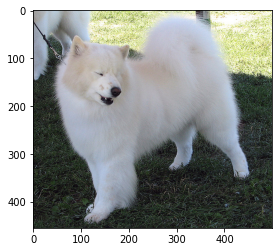

In [ ]:
# Import random image form Oxford-IIIT Pets
import os
from pathlib import Path
import random
import matplotlib.pyplot as plt
path = Path('../content/Dataset/oxford_IIIT/images')
image_filename = random.choice(list(path.glob('*.jpg')))
img = plt.imread(image_filename)
plt.imshow(img)
plt.show()

In [ ]:
# Preprocess the image and prepare a batch to be passed through the network
PIL_image = Image.fromarray(img)
img_t = transform(PIL_image)
batch_t = torch.unsqueeze(img_t,0)

In [ ]:
# Put the model in Evaluation mode and carry out the inference
resnet152.eval()
with torch.no_grad():
  out = resnet152(batch_t)

## Classification and Prediction

In [ ]:
# Load ImageNet class names
label_path = '../content/Dataset/ImageNet/labels_map.txt'
labels_map = json.load(open(label_path))
labels_map = [labels_map[str(i)] for i in range(1000)]

In [ ]:
# Print Predictions Using ImageNet Class Annotation
print('----------PREDICTION RESULTS---------')
for idx in torch.topk(out, k=5).indices.squeeze(0).tolist():
    prob = torch.softmax(out, dim=1)[0, idx].item()
    print('{label:<75} - {p:.2f}%'.format(label=labels_map[idx], p=prob*100))

----------PREDICTION RESULTS---------
Samoyed, Samoyede                                                           - 98.33%
chow, chow chow                                                             - 0.96%
Pomeranian                                                                  - 0.15%
keeshond                                                                    - 0.13%
malamute, malemute, Alaskan malamute                                        - 0.13%


# **Part 2 :** Evaluating the Performance of Oxford-IIIT Pets on Pretrained EfficientNet-B7

In [ ]:
# Get EfficientNet PyTorch
!pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-cp36-none-any.whl size=12422 sha256=5b3251f71fab3c4408bf0ff9477af0fdf0f7ea8a0313ffb4bcf5a1f2bb384ac4
  Stored in directory: /root/.cache/pip/wheels/42/1e/a9/2a578ba9ad04e776e80bf0f70d8a7f4c29ec0718b92d8f6ccd
Successfully built efficientnet-pytorch


In [ ]:
# Load Pre-Trained EfficientNet
from efficientnet_pytorch import EfficientNet
model_name = 'efficientnet-b0'
model = EfficientNet.from_pretrained(model_name)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/checkpoints/efficientnet-b0-355c32eb.pth



Loaded pretrained weights for efficientnet-b0


## Preprosessing of the Input Image 

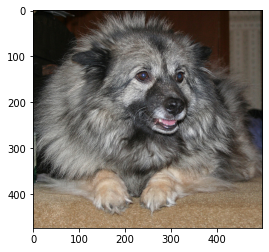

In [ ]:
# Import random image form Oxford-IIIT Pets
path = Path('../content/Dataset/oxford_IIIT/images')
image_filename = random.choice(list(path.glob('*.jpg')))
img1 = plt.imread(image_filename)
plt.imshow(img1)
plt.show()

In [ ]:
# Preprocess the image
tfms = transforms.Compose([transforms.Resize(224), transforms.ToTensor(), transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225]),])
img1 = tfms(Image.open(image_filename)).unsqueeze(0)

In [ ]:
# Extract features
features = model.extract_features(img1)
print(features.shape)

torch.Size([1, 1280, 7, 7])


## Classification and Prediction

In [ ]:
# Classify
model.eval()
with torch.no_grad():
    outputs = model(img1)

In [ ]:
# Print Predictions
print('----------PREDICTION RESULTS---------')
for idx in torch.topk(outputs, k=5).indices.squeeze(0).tolist():
    prob = torch.softmax(outputs, dim=1)[0, idx].item()
    print('{label:<75} - {p:.2f}%'.format(label=labels_map[idx], p=prob*100))

----------PREDICTION RESULTS---------
keeshond                                                                    - 80.22%
chow, chow chow                                                             - 0.56%
Pekinese, Pekingese, Peke                                                   - 0.46%
Norwegian elkhound, elkhound                                                - 0.44%
Pomeranian                                                                  - 0.43%
